# **Download the Dataset, Import required library**

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
df = pd.read_csv('/content/spam.csv',encoding="latin")

# **Read dataset**

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [57]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [58]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

# **Pre-Processing Data**

In [59]:
df=df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"])

In [60]:
df=df.rename(
{
    "v1":"Category",
    "v2":"Message"
},
    axis=1
)

In [61]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [62]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [64]:
df["Message Length"]=df["Message"].apply(len)

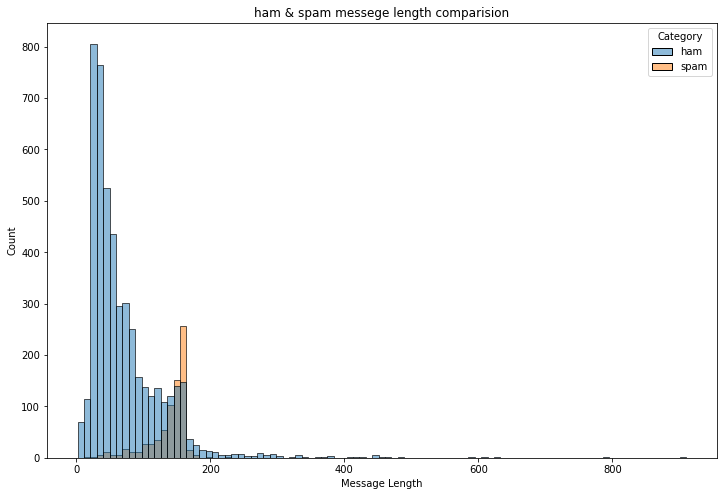

In [65]:
fig=plt.figure(figsize=(12,8))
sns.histplot(
    x=df["Message Length"],
    hue=df["Category"]
)
plt.title("ham & spam messege length comparision")
plt.show()

In [66]:
ham_desc=df[df["Category"]=="ham"]["Message Length"].describe()
spam_desc=df[df["Category"]=="spam"]["Message Length"].describe()

print("Ham Messege Length Description:\n",ham_desc)
print("************************************")
print("Spam Message Length Description:\n",spam_desc)

Ham Messege Length Description:
 count    4825.000000
mean       71.023627
std        58.016023
min         2.000000
25%        33.000000
50%        52.000000
75%        92.000000
max       910.000000
Name: Message Length, dtype: float64
************************************
Spam Message Length Description:
 count    747.000000
mean     138.866131
std       29.183082
min       13.000000
25%      132.500000
50%      149.000000
75%      157.000000
max      224.000000
Name: Message Length, dtype: float64


In [67]:
df.describe(include="all")

,Category,Message,Message Length
count,5572,5572,5572.000000
unique,2,5169,NaN
top,ham,"Sorry, I'll call later",NaN
freq,4825,30,NaN
mean,NaN,NaN,80.118808
std,NaN,NaN,59.690841
min,NaN,NaN,2.000000
25%,NaN,NaN,36.000000
50%,NaN,NaN,61.000000
75%,NaN,NaN,121.000000


In [68]:
df["Category"].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [69]:
from locale import D_FMT
ham_count=df["Category"].value_counts()[0]
spam_count=df["Category"].value_counts()[1]

total_count=df.shape[0]

print("Ham contains:{:.2f}% of total data.".format(ham_count/total_count*100))
print("Spam contains:{:.2f}% of total data.".format(spam_count/total_count*100))

Ham contains:86.59% of total data.
Spam contains:13.41% of total data.


In [70]:
minority_len=len(df[df["Category"]=="spam"])
majority_len=len(df[df["Category"]=="ham"])
minority_indices=df[df["Category"]=="spam"].index
majority_indices=df[df["Category"]=="ham"].index
random_majority_indices=np.random.choice(
    majority_indices,
    size=minority_len,
    replace=False
)
undersampled_indices=np.concatenate([minority_indices,random_majority_indices])
data=df.loc[undersampled_indices]

data=data.sample(frac=1)

data=data.reset_index()

data=data.drop(
    columns=["index"],
)

In [71]:
data["Category"].value_counts()

spam    747
ham     747
Name: Category, dtype: int64

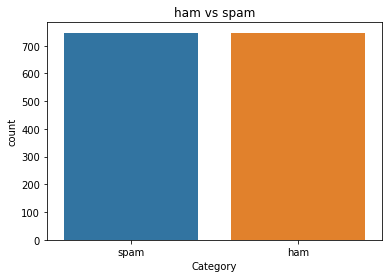

In [72]:
sns.countplot(
    data=data,
    x="Category"
)
plt.title("ham vs spam")
plt.show()

In [73]:
data.tail()

,Category,Message,Message Length
1489,ham,WOT U UP 2 J?,13
1490,spam,Got what it takes 2 take part in the WRC Rally...,159
1491,spam,WIN URGENT! Your mobile number has been awarde...,147
1492,ham,Hi juan. Im coming home on fri hey. Of course ...,159
1493,ham,I see the letter B on my car,28


In [74]:
data["Label"]=data["Category"].map(
    {
        "ham":0,
        "spam":1
    }
)

In [75]:
data.tail()

,Category,Message,Message Length,Label
1489,ham,WOT U UP 2 J?,13,0
1490,spam,Got what it takes 2 take part in the WRC Rally...,159,1
1491,spam,WIN URGENT! Your mobile number has been awarde...,147,1
1492,ham,Hi juan. Im coming home on fri hey. Of course ...,159,0
1493,ham,I see the letter B on my car,28,0


In [76]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stemmer=PorterStemmer()

In [77]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stemmer=PorterStemmer()
corpus=[]
for message in data["Message"]:
  message=re.sub("[^a-zA-Z]"," ",message)
  message=message.lower()
  message=message.split()
  message=[stemmer.stem(words)
            for words in message
             if words not in set(stopwords.words("english"))
            ]
  message=" ".join(message)
  corpus.append(message)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [78]:
from tensorflow.keras.preprocessing.text import one_hot
vocab_size=10000
oneHot_doc=[one_hot(words,n=vocab_size)
           for words in corpus
           ]

In [79]:
data["Message Length"].describe()

count    1494.000000
mean      104.485944
std        61.152633
min         3.000000
25%        49.000000
50%       114.500000
75%       152.000000
max       910.000000
Name: Message Length, dtype: float64

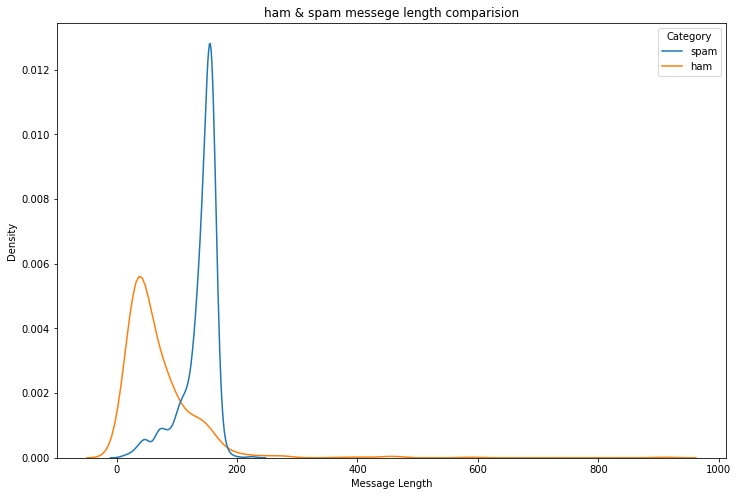

In [80]:
fig=plt.figure(figsize=(12,8))
sns.kdeplot(
    x=data["Message Length"],
    hue=data["Category"]
)
plt.title("ham & spam messege length comparision")
plt.show()

In [81]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
sentence_len=200
embedded_doc=pad_sequences(
    oneHot_doc,
    maxlen=sentence_len,
    padding="pre"
)

In [82]:
extract_features=pd.DataFrame(
    data=embedded_doc
)
target=data["Label"]


In [83]:
df_final=pd.concat([extract_features,target],axis=1)

In [84]:
df_final.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,Label
0,0,0,0,0,0,0,0,0,0,0,...,5540,4644,9862,5990,87,3584,8218,5322,1220,1
1,0,0,0,0,0,0,0,0,0,0,...,9579,8630,2403,3538,9418,6583,4589,2152,3870,1
2,0,0,0,0,0,0,0,0,0,0,...,7080,738,6356,1919,6555,2879,9665,9224,4237,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6720,8935,0
4,0,0,0,0,0,0,0,0,0,0,...,4977,6977,231,245,7502,2702,4789,2989,7205,0


In [85]:
X=df_final.drop("Label",axis=1)
y=df_final["Label"]

# **Create Model**

In [86]:
from sklearn.model_selection import train_test_split
X_trainval,X_test,y_trainval,y_test=train_test_split(
    X,
    y,
    random_state=42,
    test_size=0.15
)
X_train,X_val,y_train,y_val=train_test_split(
    X_trainval,
    y_trainval,
    random_state=42,
    test_size=0.15
)

In [87]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential

In [88]:
model=Sequential()

# **Add Layers (LSTM, Dense-(Hidden Layers), Output)**

In [89]:
feature_num=100
model.add(
    Embedding(
        input_dim=vocab_size,
        output_dim=feature_num,
        input_length=sentence_len
    )
)
model.add(
    LSTM(
    units=128
    )
)

model.add(
    Dense(
        units=1,
        activation="sigmoid"
    )
)

In [90]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 100)          1000000   
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,117,377
Trainable params: 1,117,377
Non-trainable params: 0
_________________________________________________________________


# **Compile the Model**

In [91]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(
    learning_rate=0.001
    ),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# **Fit the Model**

In [92]:
model.fit(
    X_train,
    y_train,
    validation_data=(
        X_val,
        y_val
    ),
    epochs=5
)

Epoch 1/5
34/34 [==============================] - 15s 361ms/step - loss: 0.5424 - accuracy: 0.7171 - val_loss: 0.4268 - val_accuracy: 0.7906
Epoch 2/5
34/34 [==============================] - 12s 341ms/step - loss: 0.2408 - accuracy: 0.9239 - val_loss: 0.2796 - val_accuracy: 0.8848
Epoch 3/5
34/34 [==============================] - 12s 347ms/step - loss: 0.0991 - accuracy: 0.9731 - val_loss: 0.2043 - val_accuracy: 0.9058
Epoch 4/5
34/34 [==============================] - 12s 345ms/step - loss: 0.0502 - accuracy: 0.9870 - val_loss: 0.1647 - val_accuracy: 0.9319
Epoch 5/5
34/34 [==============================] - 12s 343ms/step - loss: 0.0271 - accuracy: 0.9954 - val_loss: 0.1553 - val_accuracy: 0.9476


In [93]:
y_pred=model.predict(X_test)
y_pred=(y_pred>0.5)

8/8 [==============================] - 1s 90ms/step


In [94]:
def classify_message(model,message):
  for sentences in message:
    sentences=nltk.sent_tokenize(message)
    for sentence in sentences:
      words=re.sub("[^a-zA-Z]"," ",sentence)
      if words not in set(stopwords.words('english')):
        word=nltk.word_tokenize(words)
        word=" ".join(word)
  oneHot=[one_hot(word,n=vocab_size)]
  text=pad_sequences(oneHot,maxlen=sentence_len,padding="pre")
  predict=model.predict(text)
  if predict>0.5:
    print("It is a spam")
  else:
    print("It is not a spam")

# **Save The Model**

In [95]:
model.save("spam.h5")

# **Test the Model**

In [96]:
msg1="I am having a very good day today"
msg2="You are the lucky winner , enter this link, to get the prize"

In [97]:
classify_message(model,msg1)

1/1 [==============================] - 0s 28ms/step
It is not a spam


In [98]:
classify_message(model,msg2)

1/1 [==============================] - 0s 35ms/step
It is a spam
